## chandan shah

## NR system

In [5]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def newton_raphson_system(equations, variables, initial_guess, tolerance=1e-6, max_iter=100):
   
    f = sp.Matrix(equations)
    vars = sp.Matrix(variables)
    
   
    J = f.jacobian(vars)
    
    # Lambdify for numerical evaluation
    F_func = sp.lambdify([vars], f, modules='numpy')
    J_func = sp.lambdify([vars], J, modules='numpy')
    
   
    X = np.array(initial_guess, dtype=float)
    
    for i in range(max_iter):
        F_val = np.array(F_func(X)).astype(float).flatten()
        J_val = np.array(J_func(X)).astype(float)
        
        
        try:
            delta = np.linalg.solve(J_val, -F_val)
        except np.linalg.LinAlgError:
            print("Jacobian is singular.")
            return None

        X = X + delta

       
        if np.linalg.norm(delta, ord=2) < tolerance:
            print(f"Converged in {i+1} iterations.")
            return X
    
    print("Did not converge.")
    return X

In [6]:

x, y = sp.symbols('x y')


equations = [x**2 + y- 1-x, x**2-2*y**2 - y]
variables = [x, y]

# Initial guess
initial_guess = [1, 2]

# Solve
solution = newton_raphson_system(equations, variables, initial_guess)
print("Solution:", solution)

Converged in 5 iterations.
Solution: [1.25865202 0.67444711]


TypeError: Input z must be 2D, not 1D

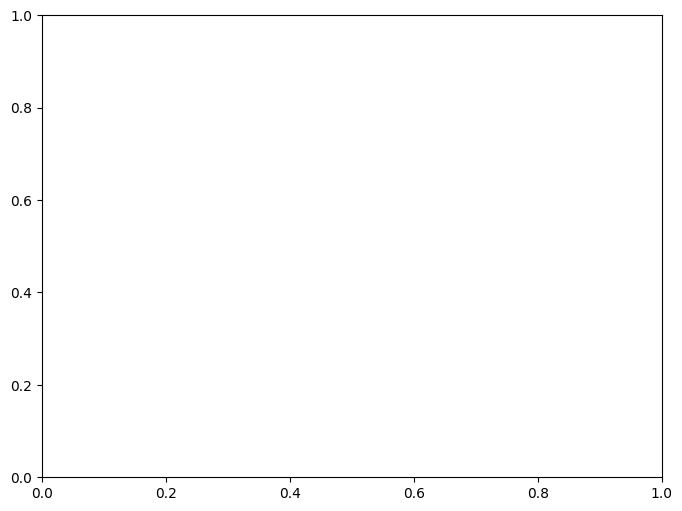

In [7]:
# Create a meshgrid for plotting
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)

# Calculate function values over the grid
F1 = x**2 + y- 1-x
F2 = x**2-2*y**2 - y

# Plot contour lines where F1 and F2 are zero
plt.figure(figsize=(8, 6))
contour1 = plt.contour(X, Y, F1, levels=[0], colors='blue', linewidths=1.5, linestyles='dashed')
contour2 = plt.contour(X, Y, F2, levels=[0], colors='red', linewidths=1.5)

# Plot the intersection point
plt.plot(x_sol, y_sol, 'ko', markersize=8, label=f'Solution ≈ ({x_sol:.2f}, {y_sol:.2f})')

# Plot settings
plt.title("Newton-Raphson System: Contour Intersection")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

Converged in 4 iterations.


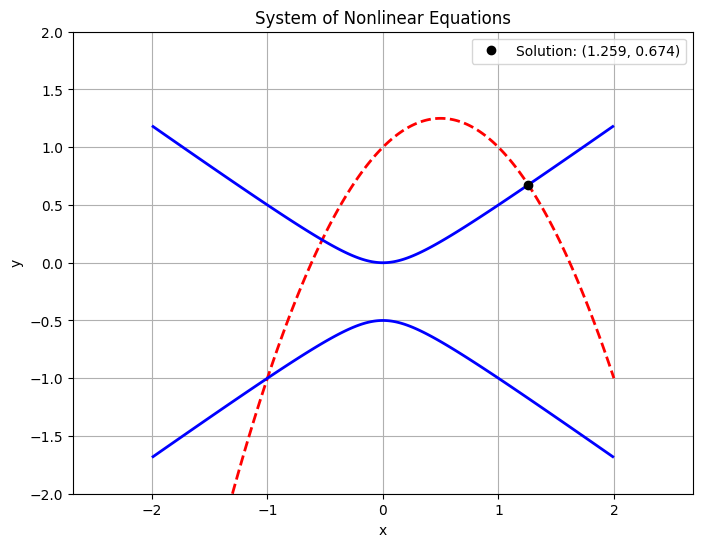

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def newton_raphson_system(equations, variables, initial_guess, tolerance=1e-6, max_iter=100):
    f = sp.Matrix(equations)
    vars = sp.Matrix(variables)
    J = f.jacobian(vars)

    F_func = sp.lambdify([vars], f, modules='numpy')
    J_func = sp.lambdify([vars], J, modules='numpy')

    X = np.array(initial_guess, dtype=float)

    for i in range(max_iter):
        F_val = np.array(F_func(X)).astype(float).flatten()
        J_val = np.array(J_func(X)).astype(float)

        try:
            delta = np.linalg.solve(J_val, -F_val)
        except np.linalg.LinAlgError:
            print("Jacobian is singular. Cannot proceed.")
            return None

        X = X + delta

        if np.linalg.norm(delta, ord=2) < tolerance:
            print(f"Converged in {i+1} iterations.")
            return X

    print("Did not converge.")
    return X

# Define symbols
x, y = sp.symbols('x y')

# Define new system of equations
eq1 = x**2 + y - 1 - x
eq2 = x**2 - 2*y**2 - y

# Initial guess
initial = [1.0, 1.0]

# Solve using Newton-Raphson
sol = newton_raphson_system([eq1, eq2], [x, y], initial)

# --- Plotting ---
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Evaluate the equations over the grid
F1 = X_grid**2 + Y_grid - 1 - X_grid
F2 = X_grid**2 - 2*Y_grid**2 - Y_grid

plt.figure(figsize=(8, 6))
contour1 = plt.contour(X_grid, Y_grid, F1, levels=[0], colors='red', linewidths=2, linestyles='dashed')
contour2 = plt.contour(X_grid, Y_grid, F2, levels=[0], colors='blue', linewidths=2)

# Plot the solution point
if sol is not None:
    plt.plot(sol[0], sol[1], 'ko', label=f'Solution: ({sol[0]:.3f}, {sol[1]:.3f})')

plt.xlabel('x')
plt.ylabel('y')
plt.title('System of Nonlinear Equations (chandan shah)')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

In [10]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def newton_raphson_system(equations, variables, initial_guess, tolerance=1e-6, max_iter=100):
   
    f = sp.Matrix(equations)
    vars = sp.Matrix(variables)
    
   
    J = f.jacobian(vars)
    
    # Lambdify for numerical evaluation
    F_func = sp.lambdify([vars], f, modules='numpy')
    J_func = sp.lambdify([vars], J, modules='numpy')
    
   
    X = np.array(initial_guess, dtype=float)
    